# This notebook combines yearly CAFE v1 atmos daily climatologies in a single dataset

In [3]:
import pandas as pd
import xarray as xr
import numpy as np
from pylatte import utils
from ipywidgets import FloatProgress

In [ ]:
# variables = ['lwf',   'shf',   'tau_x', 'tau_y', 't_ref', 'q_ref', 'u_ref', 'v_ref', 't_ref_min',
#              't_ref_max', 't_s',    'p_s', 'slp', 'h500', 'precip', 'lwf_dn_s', 'lwf_up_s', 'olwr', 
#              'swf_dn_s', 'swf_up_s', 'swf_up_toa', 'high_cld_amt', 'low_cld_amt', 'mid_cld_amt', 'tot_cld_amt']
variables = ['lwf',   'shf',   'tau_x', 'tau_y', 't_ref', 'q_ref', 'u_ref', 'v_ref', 'slp', 'h500']
variables = ['u']
years = range(2003,2016)

In [ ]:
var_list = []
for idx, variable in enumerate(variables):
    yr_list = []
    for year in years:
        fldrname = 'cafe.fcst.v1.atmos.' + str(variable) + '.' + str(year) + '.clim.nc'
        yr_list.append('/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/' + fldrname)
    
    var_list.append(xr.open_mfdataset(yr_list,concat_dim='year').mean(dim='year'))

In [ ]:
savename = 'cafe.fcst.v1.atmos_daily.1lev.2003010112_2021063012.clim.nc'
xr.merge(var_list).to_netcdf(path='/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/' + savename,
                                  mode = 'w') 

In [88]:
test1 = xr.open_dataset(base + 'cafe.fcst.v1.atmos.temp.2016.2.clim.nc')
test2 = xr.open_dataset(base + 'cafe.fcst.v1.atmos.temp.2015.1.clim.nc')

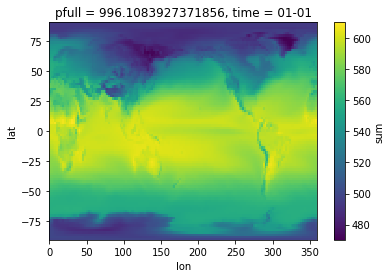

In [89]:
test1['sum'].isel(time=0,pfull=23).plot()

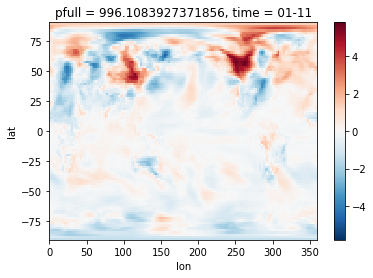

In [81]:
((test1['sum'] / test1['count']).isel(time=10,pfull=23) - (test2['sum'] / test1['count']).isel(time=10,pfull=23)).plot()

In [19]:
variable = 'lwf'
years=[2003] #range(2003,2016)
months=range(1,13)
load_list = []
for year in years:
    for month in months:
        base = '/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/tmp/'
        fldrname = 'cafe.fcst.v1.atmos.' + str(variable) + '.' + str(year) + '.' + str(month) + '.clim.nc'
        try: 
            load_list.append(xr.open_mfdataset(base + fldrname))
            print(fldrname)
        except: pass

cafe.fcst.v1.atmos.lwf.2003.1.clim.nc
cafe.fcst.v1.atmos.lwf.2003.2.clim.nc
cafe.fcst.v1.atmos.lwf.2003.3.clim.nc
cafe.fcst.v1.atmos.lwf.2003.4.clim.nc
cafe.fcst.v1.atmos.lwf.2003.5.clim.nc
cafe.fcst.v1.atmos.lwf.2003.6.clim.nc
cafe.fcst.v1.atmos.lwf.2003.7.clim.nc
cafe.fcst.v1.atmos.lwf.2003.8.clim.nc
cafe.fcst.v1.atmos.lwf.2003.9.clim.nc
cafe.fcst.v1.atmos.lwf.2003.10.clim.nc
cafe.fcst.v1.atmos.lwf.2003.11.clim.nc
cafe.fcst.v1.atmos.lwf.2003.12.clim.nc


In [20]:
numer = xr.concat(load_list,dim='run')['sum']
denom = xr.concat(load_list,dim='run')['count']

In [7]:
numer

<xarray.DataArray 'sum' (run: 156, time: 366, pfull: 24, lat: 90, lon: 144)>
dask.array<shape=(156, 366, 24, 90, 144), dtype=float64, chunksize=(1, 59, 24, 90, 144)>
Coordinates:
  * time     (time) object '01-01' '01-02' '01-03' '01-04' '01-05' '01-06' ...
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 -81.91 -79.89 -77.87 ...
  * pfull    (pfull) float64 3.65 19.09 52.34 99.13 157.4 224.7 298.9 378.1 ...
Dimensions without coordinates: run

In [8]:
denom

<xarray.DataArray 'count' (run: 156, time: 366)>
dask.array<shape=(156, 366), dtype=float64, chunksize=(1, 59)>
Coordinates:
  * time     (time) object '01-01' '01-02' '01-03' '01-04' '01-05' '01-06' ...
Dimensions without coordinates: run

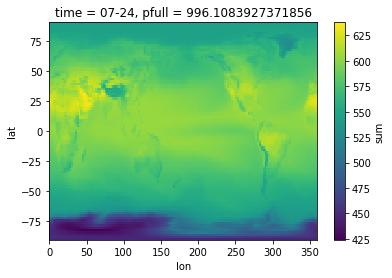

In [24]:
numer.isel(run=10,pfull=23,time=205).plot()

In [21]:
numer = xr.concat(load_list,dim='run')['sum'].sum(dim='run')
denom = xr.concat(load_list,dim='run')['count'].sum(dim='run')

In [22]:
clim = (numer / denom).rename('lwf')

In [25]:
clim

<xarray.DataArray 'lwf' (time: 366, lat: 90, lon: 144)>
dask.array<shape=(366, 90, 144), dtype=float64, chunksize=(366, 90, 144)>
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
  * lat      (lat) float64 -89.49 -87.98 -85.96 -83.93 -81.91 -79.89 -77.87 ...
  * time     (time) datetime64[ns] 2016-01-01T12:00:00 2016-01-02T12:00:00 ...

In [26]:
clim.to_netcdf(path='/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/tmp/cafe.fcst.v1.atmos.lwf.2003.test.nc',
                                  mode = 'w') 

In [24]:
clim_old = xr.open_dataset('/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/cafe.fcst.v1.atmos_daily.1lev.2003010112_2021063012.clim.nc')
clim['time'] = clim_old['time']

In [16]:
clim.to_netcdf(path='/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/cafe.fcst.v1.atmos.u.clim.nc',
                                  mode = 'w') 

In [17]:
clim_old['u'] = clim

In [18]:
clim_old.to_netcdf('/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/cafe.fcst.v1.atmos_daily.2003010112_2021063012.clim.nc')

In [8]:
test1 = xr.open_dataset('/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/tmp/cafe.fcst.v1.atmos.lwf.2003.test.nc')
test2 = xr.open_dataset('/OSM/CBR/OA_DCFP/data/intermediate_products/pylatte_climatologies/tmp/cafe.fcst.v1.atmos.lwf.2003.clim.nc')

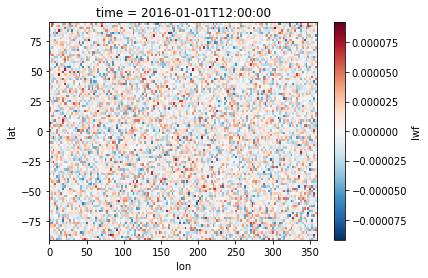

In [9]:
(100 * (test1.isel(time=0) - test2.isel(time=0)) / test1.isel(time=0))['lwf'].plot()